# Fake News Classifier Using LSTM

Dataset: https://github.com/FakeNewsChallenge/fnc-1


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense,Dropout

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


## Preparación dataset

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import torch
import torchvision
from torchvision import transforms, datasets
import numpy as np
#PyTorch permite trabajar con CUDA para realizar las operaciones en la GPU
torch.cuda.is_available()
cuda0 = torch.device('cuda:0')
torch.cuda.current_device()
print(torch.cuda.get_device_name(0))
torch.cuda.empty_cache()

Tesla P100-PCIE-16GB


###Creación del Modelo

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K 
from keras.layers import LSTM
from keras.layers import Input
def crearModelo():
  K.clear_session( )
  model=Sequential( )
  #model.add(Dense(64,,activation='relu'))
  model.add(LSTM(100,input_shape=(1,20000)))
  model.add(Dense(2,activation='softmax'))
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['categorical_accuracy'])
  return model
  #print(model.summary())


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import backend as K 
from keras.layers import LSTM
from keras.layers import Input
def crearModeloDropout():
  K.clear_session( )
  model=Sequential( )
  model.add(LSTM(50,input_shape=(1,20000)))
  model.add(Dropout(0.2))
  model.add(Dense(2,activation='softmax'))
  model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['categorical_accuracy'])
  return model
  #print(model.summary())

####Modelo 1


In [ ]:
%time X1_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_train/X1_train_tensorp0.pt')
%time X1_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_train/X1_train_tensorp1.pt')
%time X1_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_train/X1_train_tensorp2.pt')
%time y1_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_train/y1_train_tensorp0.pt')
%time y1_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_train/y1_train_tensorp1.pt')
%time y1_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_train/y1_train_tensorp2.pt')

CPU times: user 3.78 s, sys: 3.12 s, total: 6.9 s
Wall time: 26.1 s
CPU times: user 481 ms, sys: 1.11 s, total: 1.59 s
Wall time: 15 s
CPU times: user 459 ms, sys: 1.01 s, total: 1.47 s
Wall time: 24.6 s
CPU times: user 3.34 ms, sys: 2.19 ms, total: 5.53 ms
Wall time: 5.19 s
CPU times: user 2.74 ms, sys: 0 ns, total: 2.74 ms
Wall time: 435 ms
CPU times: user 1.97 ms, sys: 688 µs, total: 2.66 ms
Wall time: 394 ms


Ajuste tamaño tensores

In [ ]:
X1_trainp1 =  torch.reshape(X1_trainp1, (X1_trainp1.shape[0], 1,X1_trainp1.shape[1]))
X1_trainp2 =  torch.reshape(X1_trainp2, (X1_trainp2.shape[0], 1,X1_trainp2.shape[1]))
X1_trainp3 =  torch.reshape(X1_trainp3, (X1_trainp3.shape[0], 1,X1_trainp3.shape[1]))

In [ ]:
from keras.utils import to_categorical

y1_trainp1 = to_categorical(y1_trainp1.cpu(), num_classes=2)
y1_trainp2 = to_categorical(y1_trainp2.cpu(), num_classes=2)
y1_trainp3 = to_categorical(y1_trainp3.cpu(), num_classes=2)


Creación de modelos

In [ ]:
m1 = crearModelo()

In [ ]:
history1 = m1.fit(np.asarray(X1_trainp1.cpu()), np.asarray(y1_trainp1)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
782/782 [==============================] - 9s 5ms/step - loss: 0.4833 - categorical_accuracy: 0.7528
Epoch 2/20
782/782 [==============================] - 3s 4ms/step - loss: 0.1429 - categorical_accuracy: 0.9486
Epoch 3/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0875 - categorical_accuracy: 0.9709
Epoch 4/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0581 - categorical_accuracy: 0.9817
Epoch 5/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0410 - categorical_accuracy: 0.9870
Epoch 6/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0295 - categorical_accuracy: 0.9908
Epoch 7/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0244 - categorical_accuracy: 0.9919
Epoch 8/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0191 - categorical_accuracy: 0.9942
Epoch 9/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0149 - categorical_accuracy:

In [ ]:
history1 = m1.fit(np.asarray(X1_trainp2.cpu()), np.asarray(y1_trainp2)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
782/782 [==============================] - 3s 4ms/step - loss: 0.4767 - categorical_accuracy: 0.8987
Epoch 2/20
782/782 [==============================] - 3s 4ms/step - loss: 0.1358 - categorical_accuracy: 0.9508
Epoch 3/20
782/782 [==============================] - 3s 4ms/step - loss: 0.1044 - categorical_accuracy: 0.9625
Epoch 4/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0803 - categorical_accuracy: 0.9716
Epoch 5/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0596 - categorical_accuracy: 0.9801
Epoch 6/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0425 - categorical_accuracy: 0.9861
Epoch 7/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0286 - categorical_accuracy: 0.9909
Epoch 8/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0183 - categorical_accuracy: 0.9948
Epoch 9/20
782/782 [==============================] - 3s 4ms/step - loss: 0.0111 - categorical_accuracy:

In [ ]:
history1 = m1.fit(np.asarray(X1_trainp3.cpu()), np.asarray(y1_trainp3)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
744/744 [==============================] - 3s 4ms/step - loss: 0.4484 - categorical_accuracy: 0.9111
Epoch 2/20
744/744 [==============================] - 3s 4ms/step - loss: 0.1264 - categorical_accuracy: 0.9564
Epoch 3/20
744/744 [==============================] - 3s 5ms/step - loss: 0.0937 - categorical_accuracy: 0.9668
Epoch 4/20
744/744 [==============================] - 4s 5ms/step - loss: 0.0699 - categorical_accuracy: 0.9770
Epoch 5/20
744/744 [==============================] - 4s 5ms/step - loss: 0.0495 - categorical_accuracy: 0.9842
Epoch 6/20
744/744 [==============================] - 3s 5ms/step - loss: 0.0328 - categorical_accuracy: 0.9907
Epoch 7/20
744/744 [==============================] - 3s 4ms/step - loss: 0.0203 - categorical_accuracy: 0.9950
Epoch 8/20
744/744 [==============================] - 3s 4ms/step - loss: 0.0119 - categorical_accuracy: 0.9975
Epoch 9/20
744/744 [==============================] - 3s 4ms/step - loss: 0.0068 - categorical_accuracy:

In [ ]:
m1.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo1LSTMTrain80.h5')

In [3]:
from keras.models import load_model
m1 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo1LSTMTrain80.h5')

In [4]:
import torch
%time X1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_test/X1_test_tensorp0.pt')
%time X1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_test/X1_test_tensorp1.pt')
%time X1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_test/X1_test_tensorp2.pt')
%time y1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_test/y1_test_tensorp0.pt')
%time y1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_test/y1_test_tensorp1.pt')
%time y1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_test/y1_test_tensorp2.pt')
%time X1_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_val/X1_val_tensorp0.pt',map_location=torch.device('cpu'))
%time X1_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_val/X1_val_tensorp1.pt',map_location=torch.device('cpu'))
%time X1_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_val/X1_val_tensorp2.pt',map_location=torch.device('cpu'))
%time y1_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_val/y1_val_tensorp0.pt',map_location=torch.device('cpu'))
%time y1_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_val/y1_val_tensorp1.pt',map_location=torch.device('cpu'))
%time y1_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_val/y1_val_tensorp2.pt',map_location=torch.device('cpu'))

CPU times: user 1.29 s, sys: 1.35 s, total: 2.64 s
Wall time: 11.7 s
CPU times: user 219 ms, sys: 471 ms, total: 690 ms
Wall time: 6.2 s
CPU times: user 278 ms, sys: 937 ms, total: 1.21 s
Wall time: 15.7 s
CPU times: user 9.49 ms, sys: 0 ns, total: 9.49 ms
Wall time: 798 ms
CPU times: user 6.79 ms, sys: 0 ns, total: 6.79 ms
Wall time: 437 ms
CPU times: user 6.01 ms, sys: 0 ns, total: 6.01 ms
Wall time: 437 ms
CPU times: user 37.1 ms, sys: 1.17 s, total: 1.2 s
Wall time: 14.6 s
CPU times: user 48.8 ms, sys: 1.21 s, total: 1.26 s
Wall time: 14.1 s
CPU times: user 21.8 ms, sys: 1.14 s, total: 1.16 s
Wall time: 12 s
CPU times: user 3.02 ms, sys: 1.79 ms, total: 4.81 ms
Wall time: 565 ms
CPU times: user 5.48 ms, sys: 25 µs, total: 5.5 ms
Wall time: 489 ms
CPU times: user 4.57 ms, sys: 0 ns, total: 4.57 ms
Wall time: 474 ms


In [5]:
X1_valp1 =  torch.reshape(X1_valp1, (X1_valp1.shape[0], 1,X1_valp1.shape[1]))
X1_valp2 =  torch.reshape(X1_valp2, (X1_valp2.shape[0], 1,X1_valp2.shape[1]))
X1_valp3 =  torch.reshape(X1_valp3, (X1_valp3.shape[0], 1,X1_valp3.shape[1]))
X1_testp1 =  torch.reshape(X1_testp1, (X1_testp1.shape[0], 1,X1_testp1.shape[1]))
X1_testp2 =  torch.reshape(X1_testp2, (X1_testp2.shape[0], 1,X1_testp2.shape[1]))
X1_testp3 =  torch.reshape(X1_testp3, (X1_testp3.shape[0], 1,X1_testp3.shape[1]))

In [6]:
from keras.utils import to_categorical
y1_valp1 = to_categorical(y1_valp1.cpu(), num_classes=2)
y1_valp2 = to_categorical(y1_valp2.cpu(), num_classes=2)
y1_valp3 = to_categorical(y1_valp3.cpu(), num_classes=2)

y1_testp1 = to_categorical(y1_testp1.cpu(), num_classes=2)
y1_testp2 = to_categorical(y1_testp2.cpu(), num_classes=2)
y1_testp3 = to_categorical(y1_testp3.cpu(), num_classes=2)

In [7]:
#validacion
import numpy as np
m1.evaluate(np.asarray(X1_valp1.cpu()), np.asarray(y1_valp1),verbose=2)
m1.evaluate(np.asarray(X1_valp2.cpu()), np.asarray(y1_valp2),verbose=2)
m1.evaluate(np.asarray(X1_valp3.cpu()), np.asarray(y1_valp3),verbose=2)

469/469 - 8s - loss: 0.7618 - categorical_accuracy: 0.9194 - 8s/epoch - 17ms/step
469/469 - 2s - loss: 0.7848 - categorical_accuracy: 0.9185 - 2s/epoch - 4ms/step
475/475 - 2s - loss: 0.7658 - categorical_accuracy: 0.9153 - 2s/epoch - 4ms/step


[0.7657544612884521, 0.9153156876564026]

In [8]:
m1.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo1LSTMTrain80PostEvaluate.h5')

989/989 - 4s - 4s/epoch - 4ms/step
31622
acc: 0.9186325975586617
precision: 0.9167284082384228
recall: 0.9148695871297923
f1: 0.9186325975586617


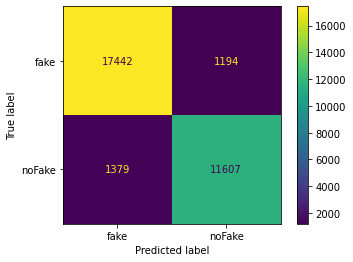

In [9]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y1predict = {}
with torch.no_grad():
  y1_test = np.concatenate((y1_testp1, y1_testp2,y1_testp3), axis=0)
  X1_test = torch.cat((X1_testp1.cpu(),X1_testp2.cpu(),X1_testp3.cpu()),0)
  y1_predictions = m1.predict(np.asarray(X1_test),verbose=2).round()
  print(len(y1_predictions))
  confusion = multilabel_confusion_matrix(y1_test,y1_predictions)
  print(f"acc: {accuracy_score(y1_test,y1_predictions)}")
  print(f"precision: {precision_score(y1_test,y1_predictions,average='macro')}")
  print(f"recall: {recall_score(y1_test,y1_predictions,average='macro')}")
  print(f"f1: {f1_score(y1_test,y1_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')


#####Probando modelo en muestra 2 y 3

In [1]:
from keras.models import load_model
m1 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo1LSTMTrain80PostEvaluate.h5')

In [2]:
import torch
%time X2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X2_test/X2_test_tensorp0.pt')
%time X2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X2_test/X2_test_tensorp1.pt')
%time X2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X2_test/X2_test_tensorp2.pt')
%time y2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y2_test/y2_test_tensorp0.pt')
%time y2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y2_test/y2_test_tensorp1.pt')
%time y2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y2_test/y2_test_tensorp2.pt')
%time X3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X3_test/X3_test_tensorp0.pt')
%time X3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X3_test/X3_test_tensorp1.pt')
%time X3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X3_test/X3_test_tensorp2.pt')
%time y3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y3_test/y3_test_tensorp0.pt')
%time y3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y3_test/y3_test_tensorp1.pt')
%time y3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y3_test/y3_test_tensorp2.pt')


CPU times: user 1.58 s, sys: 1.36 s, total: 2.94 s
Wall time: 9.49 s
CPU times: user 234 ms, sys: 494 ms, total: 728 ms
Wall time: 3.36 s
CPU times: user 219 ms, sys: 851 ms, total: 1.07 s
Wall time: 4.03 s
CPU times: user 2.39 ms, sys: 34.5 ms, total: 36.9 ms
Wall time: 39 ms
CPU times: user 713 µs, sys: 843 µs, total: 1.56 ms
Wall time: 2.6 ms
CPU times: user 1.3 ms, sys: 223 µs, total: 1.52 ms
Wall time: 2.5 ms
CPU times: user 235 ms, sys: 637 ms, total: 872 ms
Wall time: 3.35 s
CPU times: user 209 ms, sys: 473 ms, total: 682 ms
Wall time: 3.3 s
CPU times: user 339 ms, sys: 558 ms, total: 896 ms
Wall time: 3.92 s
CPU times: user 3.38 ms, sys: 13.5 ms, total: 16.9 ms
Wall time: 18.8 ms
CPU times: user 1.53 ms, sys: 0 ns, total: 1.53 ms
Wall time: 2.61 ms
CPU times: user 943 µs, sys: 660 µs, total: 1.6 ms
Wall time: 2.64 ms


In [3]:
X2_testp1 =  torch.reshape(X2_testp1, (X2_testp1.shape[0], 1,X2_testp1.shape[1]))
X2_testp2 =  torch.reshape(X2_testp2, (X2_testp2.shape[0], 1,X2_testp2.shape[1]))
X2_testp3 =  torch.reshape(X2_testp3, (X2_testp3.shape[0], 1,X2_testp3.shape[1]))
X3_testp1 =  torch.reshape(X3_testp1, (X3_testp1.shape[0], 1,X3_testp1.shape[1]))
X3_testp2 =  torch.reshape(X3_testp2, (X3_testp2.shape[0], 1,X3_testp2.shape[1]))
X3_testp3 =  torch.reshape(X3_testp3, (X3_testp3.shape[0], 1,X3_testp3.shape[1]))

In [4]:
from keras.utils import to_categorical
y2_testp1 = to_categorical(y2_testp1.cpu(), num_classes=2)
y2_testp2 = to_categorical(y2_testp2.cpu(), num_classes=2)
y2_testp3 = to_categorical(y2_testp3.cpu(), num_classes=2)
y3_testp1 = to_categorical(y3_testp1.cpu(), num_classes=2)
y3_testp2 = to_categorical(y3_testp2.cpu(), num_classes=2)
y3_testp3 = to_categorical(y3_testp3.cpu(), num_classes=2)

989/989 - 10s - 10s/epoch - 10ms/step
31622
acc: 0.9296059705268483
precision: 0.9279194093064242
recall: 0.926444127902762
f1: 0.9296059705268483


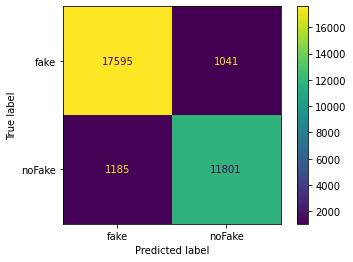

In [5]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y2predict = {}
with torch.no_grad():
  y2_test = np.concatenate((y2_testp1, y2_testp2,y2_testp3), axis=0)
  X2_test = torch.cat((X2_testp1.cpu(),X2_testp2.cpu(),X2_testp3.cpu()),0)
  y2_predictions = m1.predict(np.asarray(X2_test),verbose=2).round()
  print(len(y2_predictions))
  confusion = multilabel_confusion_matrix(y2_test,y2_predictions)
  print(f"acc: {accuracy_score(y2_test,y2_predictions)}")
  print(f"precision: {precision_score(y2_test,y2_predictions,average='macro')}")
  print(f"recall: {recall_score(y2_test,y2_predictions,average='macro')}")
  print(f"f1: {f1_score(y2_test,y2_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')

989/989 - 10s - 10s/epoch - 10ms/step
31622
acc: 0.9295427234204036
precision: 0.9275356572335729
recall: 0.9267873575078972
f1: 0.9295427234204036


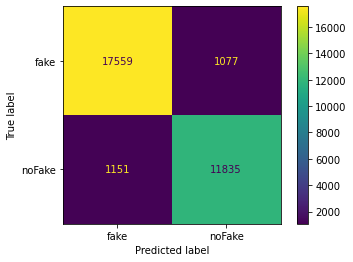

In [5]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y3predict = {}
with torch.no_grad():
  y3_test = np.concatenate((y3_testp1, y3_testp2,y3_testp3), axis=0)
  X3_test = torch.cat((X3_testp1.cpu(),X3_testp2.cpu(),X3_testp3.cpu()),0)
  y3_predictions = m1.predict(np.asarray(X3_test),verbose=2).round()
  print(len(y3_predictions))
  confusion = multilabel_confusion_matrix(y3_test,y3_predictions)
  print(f"acc: {accuracy_score(y3_test,y3_predictions)}")
  print(f"precision: {precision_score(y3_test,y3_predictions,average='macro')}")
  print(f"recall: {recall_score(y3_test,y3_predictions,average='macro')}")
  print(f"f1: {f1_score(y3_test,y3_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')

####Modelo 2


In [ ]:
%time X2_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X2_train/X2_train_tensorp0.pt')
%time X2_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X2_train/X2_train_tensorp1.pt')
%time X2_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X2_train/X2_train_tensorp2.pt')
%time y2_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y2_train/y2_train_tensorp0.pt')
%time y2_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y2_train/y2_train_tensorp1.pt')
%time y2_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y2_train/y2_train_tensorp2.pt')

CPU times: user 2.95 s, sys: 3.16 s, total: 6.11 s
Wall time: 26.5 s
CPU times: user 394 ms, sys: 1.37 s, total: 1.76 s
Wall time: 12.4 s
CPU times: user 348 ms, sys: 1.24 s, total: 1.59 s
Wall time: 30.1 s
CPU times: user 3.34 ms, sys: 0 ns, total: 3.34 ms
Wall time: 530 ms
CPU times: user 2.66 ms, sys: 0 ns, total: 2.66 ms
Wall time: 452 ms
CPU times: user 2.25 ms, sys: 571 µs, total: 2.82 ms
Wall time: 416 ms


Ajuste tamaño tensores

In [ ]:
X2_trainp1 =  torch.reshape(X2_trainp1, (X2_trainp1.shape[0], 1,X2_trainp1.shape[1]))
X2_trainp2 =  torch.reshape(X2_trainp2, (X2_trainp2.shape[0], 1,X2_trainp2.shape[1]))
X2_trainp3 =  torch.reshape(X2_trainp3, (X2_trainp3.shape[0], 1,X2_trainp3.shape[1]))

In [ ]:
from keras.utils import to_categorical

y2_trainp1 = to_categorical(y2_trainp1.cpu(), num_classes=2)
y2_trainp2 = to_categorical(y2_trainp2.cpu(), num_classes=2)
y2_trainp3 = to_categorical(y2_trainp3.cpu(), num_classes=2)


Creación de modelos

In [ ]:
m2 = crearModelo()

In [ ]:
history1 = m2.fit(np.asarray(X2_trainp1.cpu()), np.asarray(y2_trainp1)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
782/782 [==============================] - 10s 6ms/step - loss: 0.4835 - categorical_accuracy: 0.7515
Epoch 2/20
782/782 [==============================] - 5s 6ms/step - loss: 0.1454 - categorical_accuracy: 0.9479
Epoch 3/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0915 - categorical_accuracy: 0.9690
Epoch 4/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0599 - categorical_accuracy: 0.9808
Epoch 5/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0457 - categorical_accuracy: 0.9862
Epoch 6/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0340 - categorical_accuracy: 0.9893
Epoch 7/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0246 - categorical_accuracy: 0.9921
Epoch 8/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0206 - categorical_accuracy: 0.9938
Epoch 9/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0176 - categorical_accuracy

In [ ]:
history1 = m2.fit(np.asarray(X2_trainp2.cpu()), np.asarray(y2_trainp2)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
782/782 [==============================] - 5s 6ms/step - loss: 0.5119 - categorical_accuracy: 0.8952
Epoch 2/20
782/782 [==============================] - 5s 6ms/step - loss: 0.1425 - categorical_accuracy: 0.9471
Epoch 3/20
782/782 [==============================] - 5s 6ms/step - loss: 0.1090 - categorical_accuracy: 0.9595
Epoch 4/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0831 - categorical_accuracy: 0.9699
Epoch 5/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0610 - categorical_accuracy: 0.9785
Epoch 6/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0427 - categorical_accuracy: 0.9864
Epoch 7/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0285 - categorical_accuracy: 0.9912
Epoch 8/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0184 - categorical_accuracy: 0.9945
Epoch 9/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0111 - categorical_accuracy:

In [ ]:
history1 = m2.fit(np.asarray(X2_trainp3.cpu()), np.asarray(y2_trainp3)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
744/744 [==============================] - 4s 6ms/step - loss: 0.4181 - categorical_accuracy: 0.9143
Epoch 2/20
744/744 [==============================] - 5s 6ms/step - loss: 0.1261 - categorical_accuracy: 0.9561
Epoch 3/20
744/744 [==============================] - 4s 6ms/step - loss: 0.0932 - categorical_accuracy: 0.9678
Epoch 4/20
744/744 [==============================] - 4s 6ms/step - loss: 0.0689 - categorical_accuracy: 0.9772
Epoch 5/20
744/744 [==============================] - 4s 6ms/step - loss: 0.0480 - categorical_accuracy: 0.9852
Epoch 6/20
744/744 [==============================] - 4s 6ms/step - loss: 0.0310 - categorical_accuracy: 0.9909
Epoch 7/20
744/744 [==============================] - 4s 6ms/step - loss: 0.0186 - categorical_accuracy: 0.9954
Epoch 8/20
744/744 [==============================] - 5s 6ms/step - loss: 0.0101 - categorical_accuracy: 0.9980
Epoch 9/20
744/744 [==============================] - 4s 6ms/step - loss: 0.0055 - categorical_accuracy:

In [ ]:
m2.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo2LSTMTrain80.h5')

In [1]:
from keras.models import load_model
m2 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo2LSTMTrain80.h5')

In [2]:
import torch
%time X2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X2_test/X2_test_tensorp0.pt')
%time X2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X2_test/X2_test_tensorp1.pt')
%time X2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X2_test/X2_test_tensorp2.pt')
%time y2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y2_test/y2_test_tensorp0.pt')
%time y2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y2_test/y2_test_tensorp1.pt')
%time y2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y2_test/y2_test_tensorp2.pt')
%time X2_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X2_val/X2_val_tensorp0.pt',map_location=torch.device('cpu'))
%time X2_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X2_val/X2_val_tensorp1.pt',map_location=torch.device('cpu'))
%time X2_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X2_val/X2_val_tensorp2.pt',map_location=torch.device('cpu'))
%time y2_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y2_val/y2_val_tensorp0.pt',map_location=torch.device('cpu'))
%time y2_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y2_val/y2_val_tensorp1.pt',map_location=torch.device('cpu'))
%time y2_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y2_val/y2_val_tensorp2.pt',map_location=torch.device('cpu'))

CPU times: user 1.66 s, sys: 1.39 s, total: 3.04 s
Wall time: 9.75 s
CPU times: user 234 ms, sys: 452 ms, total: 687 ms
Wall time: 3.83 s
CPU times: user 269 ms, sys: 891 ms, total: 1.16 s
Wall time: 6.09 s
CPU times: user 1.44 ms, sys: 1.5 ms, total: 2.94 ms
Wall time: 8.96 ms
CPU times: user 0 ns, sys: 851 µs, total: 851 µs
Wall time: 1.86 ms
CPU times: user 786 µs, sys: 0 ns, total: 786 µs
Wall time: 1.83 ms
CPU times: user 97.3 ms, sys: 792 ms, total: 889 ms
Wall time: 14.5 s
CPU times: user 39.2 ms, sys: 1.26 s, total: 1.3 s
Wall time: 13.3 s
CPU times: user 53.6 ms, sys: 1.22 s, total: 1.28 s
Wall time: 11.1 s
CPU times: user 4.94 ms, sys: 0 ns, total: 4.94 ms
Wall time: 514 ms
CPU times: user 4.8 ms, sys: 0 ns, total: 4.8 ms
Wall time: 466 ms
CPU times: user 5.69 ms, sys: 0 ns, total: 5.69 ms
Wall time: 467 ms


In [3]:
X2_valp1 =  torch.reshape(X2_valp1, (X2_valp1.shape[0], 1,X2_valp1.shape[1]))
X2_valp2 =  torch.reshape(X2_valp2, (X2_valp2.shape[0], 1,X2_valp2.shape[1]))
X2_valp3 =  torch.reshape(X2_valp3, (X2_valp3.shape[0], 1,X2_valp3.shape[1]))
X2_testp1 =  torch.reshape(X2_testp1, (X2_testp1.shape[0], 1,X2_testp1.shape[1]))
X2_testp2 =  torch.reshape(X2_testp2, (X2_testp2.shape[0], 1,X2_testp2.shape[1]))
X2_testp3 =  torch.reshape(X2_testp3, (X2_testp3.shape[0], 1,X2_testp3.shape[1]))

In [4]:
from keras.utils import to_categorical
y2_valp1 = to_categorical(y2_valp1.cpu(), num_classes=2)
y2_valp2 = to_categorical(y2_valp2.cpu(), num_classes=2)
y2_valp3 = to_categorical(y2_valp3.cpu(), num_classes=2)

y2_testp1 = to_categorical(y2_testp1.cpu(), num_classes=2)
y2_testp2 = to_categorical(y2_testp2.cpu(), num_classes=2)
y2_testp3 = to_categorical(y2_testp3.cpu(), num_classes=2)

In [5]:
#validacion
import numpy as np
m2.evaluate(np.asarray(X2_valp1.cpu()), np.asarray(y2_valp1),verbose=2)
m2.evaluate(np.asarray(X2_valp2.cpu()), np.asarray(y2_valp2),verbose=2)
m2.evaluate(np.asarray(X2_valp3.cpu()), np.asarray(y2_valp3),verbose=2)

469/469 - 7s - loss: 0.8096 - categorical_accuracy: 0.9148 - 7s/epoch - 15ms/step
469/469 - 2s - loss: 0.7462 - categorical_accuracy: 0.9184 - 2s/epoch - 4ms/step
475/475 - 2s - loss: 0.7870 - categorical_accuracy: 0.9174 - 2s/epoch - 4ms/step


[0.786955714225769, 0.9174245595932007]

In [6]:
m2.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo2LSTMTrain80PostEvaluate.h5')

989/989 - 4s - 4s/epoch - 4ms/step
31622
acc: 0.9168300550249826
precision: 0.9143971630571499
recall: 0.9136321192829817
f1: 0.9168300550249826


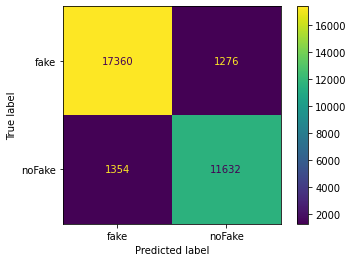

In [7]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix

with torch.no_grad():
  y2_test = np.concatenate((y2_testp1, y2_testp2,y2_testp3), axis=0)
  X2_test = torch.cat((X2_testp1.cpu(),X2_testp2.cpu(),X2_testp3.cpu()),0)
  y2_predictions = m2.predict(np.asarray(X2_test),verbose=2).round()
  print(len(y2_predictions))
  confusion = multilabel_confusion_matrix(y2_test,y2_predictions)
  print(f"acc: {accuracy_score(y2_test,y2_predictions)}")
  print(f"precision: {precision_score(y2_test,y2_predictions,average='macro')}")
  print(f"recall: {recall_score(y2_test,y2_predictions,average='macro')}")
  print(f"f1: {f1_score(y2_test,y2_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')


#####Probando modelo en muestra 1 y 3

In [1]:
from keras.models import load_model
m2 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo2LSTMTrain80PostEvaluate.h5')

In [2]:
import torch
%time X1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_test/X1_test_tensorp0.pt')
%time X1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_test/X1_test_tensorp1.pt')
%time X1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_test/X1_test_tensorp2.pt')
%time y1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_test/y1_test_tensorp0.pt')
%time y1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_test/y1_test_tensorp1.pt')
%time y1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_test/y1_test_tensorp2.pt')
%time X3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X3_test/X3_test_tensorp0.pt')
%time X3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X3_test/X3_test_tensorp1.pt')
%time X3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X3_test/X3_test_tensorp2.pt')
%time y3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y3_test/y3_test_tensorp0.pt')
%time y3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y3_test/y3_test_tensorp1.pt')
%time y3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y3_test/y3_test_tensorp2.pt')


CPU times: user 1.52 s, sys: 1.38 s, total: 2.9 s
Wall time: 10.5 s
CPU times: user 226 ms, sys: 456 ms, total: 683 ms
Wall time: 3.28 s
CPU times: user 247 ms, sys: 876 ms, total: 1.12 s
Wall time: 3.87 s
CPU times: user 1.03 ms, sys: 1.26 ms, total: 2.29 ms
Wall time: 6.45 ms
CPU times: user 1.53 ms, sys: 0 ns, total: 1.53 ms
Wall time: 2.5 ms
CPU times: user 1.25 ms, sys: 48 µs, total: 1.29 ms
Wall time: 2.27 ms
CPU times: user 248 ms, sys: 619 ms, total: 867 ms
Wall time: 3.37 s
CPU times: user 224 ms, sys: 460 ms, total: 685 ms
Wall time: 3.29 s
CPU times: user 334 ms, sys: 600 ms, total: 933 ms
Wall time: 3.95 s
CPU times: user 1.01 ms, sys: 0 ns, total: 1.01 ms
Wall time: 4.82 ms
CPU times: user 1.77 ms, sys: 0 ns, total: 1.77 ms
Wall time: 3.39 ms
CPU times: user 1.21 ms, sys: 123 µs, total: 1.33 ms
Wall time: 2.33 ms


In [3]:
X1_testp1 =  torch.reshape(X1_testp1, (X1_testp1.shape[0], 1,X1_testp1.shape[1]))
X1_testp2 =  torch.reshape(X1_testp2, (X1_testp2.shape[0], 1,X1_testp2.shape[1]))
X1_testp3 =  torch.reshape(X1_testp3, (X1_testp3.shape[0], 1,X1_testp3.shape[1]))
X3_testp1 =  torch.reshape(X3_testp1, (X3_testp1.shape[0], 1,X3_testp1.shape[1]))
X3_testp2 =  torch.reshape(X3_testp2, (X3_testp2.shape[0], 1,X3_testp2.shape[1]))
X3_testp3 =  torch.reshape(X3_testp3, (X3_testp3.shape[0], 1,X3_testp3.shape[1]))

In [4]:
from keras.utils import to_categorical
y1_testp1 = to_categorical(y1_testp1.cpu(), num_classes=2)
y1_testp2 = to_categorical(y1_testp2.cpu(), num_classes=2)
y1_testp3 = to_categorical(y1_testp3.cpu(), num_classes=2)
y3_testp1 = to_categorical(y3_testp1.cpu(), num_classes=2)
y3_testp2 = to_categorical(y3_testp2.cpu(), num_classes=2)
y3_testp3 = to_categorical(y3_testp3.cpu(), num_classes=2)

989/989 - 9s - 9s/epoch - 9ms/step
31622
acc: 0.9286888874833976
precision: 0.927020247966672
recall: 0.9254325997118696
f1: 0.9286888874833976


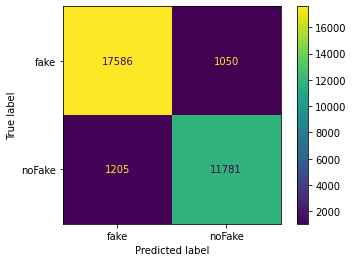

In [5]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y1predict = {}
with torch.no_grad():
  y1_test = np.concatenate((y1_testp1, y1_testp2,y1_testp3), axis=0)
  X1_test = torch.cat((X1_testp1.cpu(),X1_testp2.cpu(),X1_testp3.cpu()),0)
  y1_predictions = m2.predict(np.asarray(X1_test),verbose=2).round()
  print(len(y1_predictions))
  confusion = multilabel_confusion_matrix(y1_test,y1_predictions)
  print(f"acc: {accuracy_score(y1_test,y1_predictions)}")
  print(f"precision: {precision_score(y1_test,y1_predictions,average='macro')}")
  print(f"recall: {recall_score(y1_test,y1_predictions,average='macro')}")
  print(f"f1: {f1_score(y1_test,y1_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')

989/989 - 9s - 9s/epoch - 9ms/step
31622
acc: 0.9282145341850611
precision: 0.9261964308319511
recall: 0.925368675966427
f1: 0.928214534185061


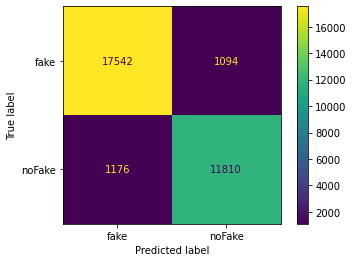

In [5]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y3predict = {}
with torch.no_grad():
  y3_test = np.concatenate((y3_testp1, y3_testp2,y3_testp3), axis=0)
  X3_test = torch.cat((X3_testp1.cpu(),X3_testp2.cpu(),X3_testp3.cpu()),0)
  y3_predictions = m2.predict(np.asarray(X3_test),verbose=2).round()
  print(len(y3_predictions))
  confusion = multilabel_confusion_matrix(y3_test,y3_predictions)
  print(f"acc: {accuracy_score(y3_test,y3_predictions)}")
  print(f"precision: {precision_score(y3_test,y3_predictions,average='macro')}")
  print(f"recall: {recall_score(y3_test,y3_predictions,average='macro')}")
  print(f"f1: {f1_score(y3_test,y3_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')

####Modelo 3

In [ ]:
%time X3_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X3_train/X3_train_tensorp0.pt')
%time X3_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X3_train/X3_train_tensorp1.pt')
%time X3_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X3_train/X3_train_tensorp2.pt')
%time y3_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y3_train/y3_train_tensorp0.pt')
%time y3_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y3_train/y3_train_tensorp1.pt')
%time y3_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y3_train/y3_train_tensorp2.pt')

CPU times: user 2.83 s, sys: 3.09 s, total: 5.92 s
Wall time: 14.9 s
CPU times: user 376 ms, sys: 1.32 s, total: 1.7 s
Wall time: 22.8 s
CPU times: user 383 ms, sys: 1.3 s, total: 1.69 s
Wall time: 19.1 s
CPU times: user 2.43 ms, sys: 725 µs, total: 3.16 ms
Wall time: 762 ms
CPU times: user 1.92 ms, sys: 848 µs, total: 2.77 ms
Wall time: 481 ms
CPU times: user 1.92 ms, sys: 879 µs, total: 2.8 ms
Wall time: 406 ms


Ajuste tamaño tensores

In [ ]:
X3_trainp1 =  torch.reshape(X3_trainp1, (X3_trainp1.shape[0], 1,X3_trainp1.shape[1]))
X3_trainp2 =  torch.reshape(X3_trainp2, (X3_trainp2.shape[0], 1,X3_trainp2.shape[1]))
X3_trainp3 =  torch.reshape(X3_trainp3, (X3_trainp3.shape[0], 1,X3_trainp3.shape[1]))

In [ ]:
from keras.utils import to_categorical

y3_trainp1 = to_categorical(y3_trainp1.cpu(), num_classes=2)
y3_trainp2 = to_categorical(y3_trainp2.cpu(), num_classes=2)
y3_trainp3 = to_categorical(y3_trainp3.cpu(), num_classes=2)


Creación de modelos

In [ ]:
m3 = crearModelo()

In [ ]:
history1 = m3.fit(np.asarray(X3_trainp1.cpu()), np.asarray(y3_trainp1)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
782/782 [==============================] - 8s 6ms/step - loss: 0.4857 - categorical_accuracy: 0.7535
Epoch 2/20
782/782 [==============================] - 5s 6ms/step - loss: 0.1456 - categorical_accuracy: 0.9477
Epoch 3/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0877 - categorical_accuracy: 0.9710
Epoch 4/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0597 - categorical_accuracy: 0.9816
Epoch 5/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0421 - categorical_accuracy: 0.9868
Epoch 6/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0338 - categorical_accuracy: 0.9893
Epoch 7/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0256 - categorical_accuracy: 0.9919
Epoch 8/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0213 - categorical_accuracy: 0.9934
Epoch 9/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0174 - categorical_accuracy:

In [ ]:
history1 = m3.fit(np.asarray(X3_trainp2.cpu()), np.asarray(y3_trainp2)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
782/782 [==============================] - 5s 6ms/step - loss: 0.5053 - categorical_accuracy: 0.8936
Epoch 2/20
782/782 [==============================] - 5s 6ms/step - loss: 0.1395 - categorical_accuracy: 0.9493
Epoch 3/20
782/782 [==============================] - 5s 6ms/step - loss: 0.1054 - categorical_accuracy: 0.9606
Epoch 4/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0790 - categorical_accuracy: 0.9714
Epoch 5/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0565 - categorical_accuracy: 0.9806
Epoch 6/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0381 - categorical_accuracy: 0.9876
Epoch 7/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0240 - categorical_accuracy: 0.9924
Epoch 8/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0145 - categorical_accuracy: 0.9957
Epoch 9/20
782/782 [==============================] - 5s 6ms/step - loss: 0.0086 - categorical_accuracy:

In [ ]:
history1 = m3.fit(np.asarray(X3_trainp3.cpu()), np.asarray(y3_trainp3)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
744/744 [==============================] - 4s 6ms/step - loss: 0.4609 - categorical_accuracy: 0.9125
Epoch 2/20
744/744 [==============================] - 4s 6ms/step - loss: 0.1259 - categorical_accuracy: 0.9565
Epoch 3/20
744/744 [==============================] - 4s 6ms/step - loss: 0.0920 - categorical_accuracy: 0.9667
Epoch 4/20
744/744 [==============================] - 4s 6ms/step - loss: 0.0684 - categorical_accuracy: 0.9768
Epoch 5/20
744/744 [==============================] - 4s 6ms/step - loss: 0.0483 - categorical_accuracy: 0.9846
Epoch 6/20
744/744 [==============================] - 4s 6ms/step - loss: 0.0320 - categorical_accuracy: 0.9901
Epoch 7/20
744/744 [==============================] - 4s 6ms/step - loss: 0.0194 - categorical_accuracy: 0.9946
Epoch 8/20
744/744 [==============================] - 4s 6ms/step - loss: 0.0110 - categorical_accuracy: 0.9977
Epoch 9/20
744/744 [==============================] - 4s 6ms/step - loss: 0.0060 - categorical_accuracy:

In [ ]:
m3.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo3LSTMTrain80.h5')

In [1]:
from keras.models import load_model
m3 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo3LSTMTrain80.h5')

In [2]:
import torch
%time X3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X3_test/X3_test_tensorp0.pt')
%time X3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X3_test/X3_test_tensorp1.pt')
%time X3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X3_test/X3_test_tensorp2.pt')
%time y3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y3_test/y3_test_tensorp0.pt')
%time y3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y3_test/y3_test_tensorp1.pt')
%time y3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y3_test/y3_test_tensorp2.pt')
%time X3_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X3_val/X3_val_tensorp0.pt',map_location=torch.device('cpu'))
%time X3_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X3_val/X3_val_tensorp1.pt',map_location=torch.device('cpu'))
%time X3_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X3_val/X3_val_tensorp2.pt',map_location=torch.device('cpu'))
%time y3_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y3_val/y3_val_tensorp0.pt',map_location=torch.device('cpu'))
%time y3_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y3_val/y3_val_tensorp1.pt',map_location=torch.device('cpu'))
%time y3_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y3_val/y3_val_tensorp2.pt',map_location=torch.device('cpu'))

CPU times: user 1.62 s, sys: 1.51 s, total: 3.13 s
Wall time: 10.3 s
CPU times: user 219 ms, sys: 497 ms, total: 716 ms
Wall time: 3.57 s
CPU times: user 258 ms, sys: 931 ms, total: 1.19 s
Wall time: 5.13 s
CPU times: user 1.43 ms, sys: 256 µs, total: 1.69 ms
Wall time: 12.7 ms
CPU times: user 1.05 ms, sys: 410 µs, total: 1.46 ms
Wall time: 4.43 ms
CPU times: user 829 µs, sys: 902 µs, total: 1.73 ms
Wall time: 2.99 ms
CPU times: user 94.1 ms, sys: 836 ms, total: 931 ms
Wall time: 13.1 s
CPU times: user 97.6 ms, sys: 1.29 s, total: 1.39 s
Wall time: 14.4 s
CPU times: user 58.1 ms, sys: 1.12 s, total: 1.18 s
Wall time: 10.6 s
CPU times: user 1.89 ms, sys: 3.09 ms, total: 4.98 ms
Wall time: 447 ms
CPU times: user 2.94 ms, sys: 628 µs, total: 3.57 ms
Wall time: 504 ms
CPU times: user 7.2 ms, sys: 23 µs, total: 7.23 ms
Wall time: 532 ms


In [3]:
X3_valp1 =  torch.reshape(X3_valp1, (X3_valp1.shape[0], 1,X3_valp1.shape[1]))
X3_valp2 =  torch.reshape(X3_valp2, (X3_valp2.shape[0], 1,X3_valp2.shape[1]))
X3_valp3 =  torch.reshape(X3_valp3, (X3_valp3.shape[0], 1,X3_valp3.shape[1]))
X3_testp1 =  torch.reshape(X3_testp1, (X3_testp1.shape[0], 1,X3_testp1.shape[1]))
X3_testp2 =  torch.reshape(X3_testp2, (X3_testp2.shape[0], 1,X3_testp2.shape[1]))
X3_testp3 =  torch.reshape(X3_testp3, (X3_testp3.shape[0], 1,X3_testp3.shape[1]))

In [4]:
from keras.utils import to_categorical
y3_valp1 = to_categorical(y3_valp1.cpu(), num_classes=2)
y3_valp2 = to_categorical(y3_valp2.cpu(), num_classes=2)
y3_valp3 = to_categorical(y3_valp3.cpu(), num_classes=2)

y3_testp1 = to_categorical(y3_testp1.cpu(), num_classes=2)
y3_testp2 = to_categorical(y3_testp2.cpu(), num_classes=2)
y3_testp3 = to_categorical(y3_testp3.cpu(), num_classes=2)

In [5]:
#validacion
import numpy as np
m3.evaluate(np.asarray(X3_valp1.cpu()), np.asarray(y3_valp1),verbose=2)
m3.evaluate(np.asarray(X3_valp2.cpu()), np.asarray(y3_valp2),verbose=2)
m3.evaluate(np.asarray(X3_valp3.cpu()), np.asarray(y3_valp3),verbose=2)

469/469 - 9s - loss: 0.7483 - categorical_accuracy: 0.9175 - 9s/epoch - 19ms/step
469/469 - 2s - loss: 0.7522 - categorical_accuracy: 0.9152 - 2s/epoch - 4ms/step
475/475 - 2s - loss: 0.7449 - categorical_accuracy: 0.9180 - 2s/epoch - 4ms/step


[0.7448881268501282, 0.9180176854133606]

In [6]:
m3.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo3LSTMTrain80PostEvaluate.h5')

989/989 - 4s - 4s/epoch - 4ms/step
31622
acc: 0.9175257731958762
precision: 0.9156208017358167
recall: 0.9136737337652281
f1: 0.9175257731958762


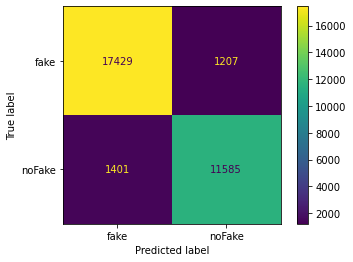

In [7]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix

with torch.no_grad():
  y3_test = np.concatenate((y3_testp1, y3_testp2,y3_testp3), axis=0)
  X3_test = torch.cat((X3_testp1.cpu(),X3_testp2.cpu(),X3_testp3.cpu()),0)
  y3_predictions = m3.predict(np.asarray(X3_test),verbose=2).round()
  print(len(y3_predictions))
  confusion = multilabel_confusion_matrix(y3_test,y3_predictions)
  print(f"acc: {accuracy_score(y3_test,y3_predictions)}")
  print(f"precision: {precision_score(y3_test,y3_predictions,average='macro')}")
  print(f"recall: {recall_score(y3_test,y3_predictions,average='macro')}")
  print(f"f1: {f1_score(y3_test,y3_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')



#####Probando modelo en muestra 1 y 2

In [1]:
from keras.models import load_model
m3 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Modelos/modelo3LSTMTrain80PostEvaluate.h5')

In [2]:
import torch
%time X1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_test/X1_test_tensorp0.pt')
%time X1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_test/X1_test_tensorp1.pt')
%time X1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_test/X1_test_tensorp2.pt')
%time y1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_test/y1_test_tensorp0.pt')
%time y1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_test/y1_test_tensorp1.pt')
%time y1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_test/y1_test_tensorp2.pt')
%time X2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X2_test/X2_test_tensorp0.pt')
%time X2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X2_test/X2_test_tensorp1.pt')
%time X2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X2_test/X2_test_tensorp2.pt')
%time y2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y2_test/y2_test_tensorp0.pt')
%time y2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y2_test/y2_test_tensorp1.pt')
%time y2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y2_test/y2_test_tensorp2.pt')


CPU times: user 1.44 s, sys: 1.35 s, total: 2.8 s
Wall time: 9.11 s
CPU times: user 226 ms, sys: 491 ms, total: 717 ms
Wall time: 3.29 s
CPU times: user 206 ms, sys: 966 ms, total: 1.17 s
Wall time: 3.87 s
CPU times: user 3.2 ms, sys: 0 ns, total: 3.2 ms
Wall time: 5.55 ms
CPU times: user 1.37 ms, sys: 205 µs, total: 1.57 ms
Wall time: 3.37 ms
CPU times: user 1.03 ms, sys: 783 µs, total: 1.81 ms
Wall time: 2.94 ms
CPU times: user 260 ms, sys: 548 ms, total: 809 ms
Wall time: 3.38 s
CPU times: user 222 ms, sys: 495 ms, total: 717 ms
Wall time: 3.33 s
CPU times: user 332 ms, sys: 622 ms, total: 954 ms
Wall time: 3.95 s
CPU times: user 1.11 ms, sys: 959 µs, total: 2.07 ms
Wall time: 4.95 ms
CPU times: user 1.86 ms, sys: 0 ns, total: 1.86 ms
Wall time: 6.08 ms
CPU times: user 415 µs, sys: 306 µs, total: 721 µs
Wall time: 3.22 ms


In [3]:
X1_testp1 =  torch.reshape(X1_testp1, (X1_testp1.shape[0], 1,X1_testp1.shape[1]))
X1_testp2 =  torch.reshape(X1_testp2, (X1_testp2.shape[0], 1,X1_testp2.shape[1]))
X1_testp3 =  torch.reshape(X1_testp3, (X1_testp3.shape[0], 1,X1_testp3.shape[1]))
X2_testp1 =  torch.reshape(X2_testp1, (X2_testp1.shape[0], 1,X2_testp1.shape[1]))
X2_testp2 =  torch.reshape(X2_testp2, (X2_testp2.shape[0], 1,X2_testp2.shape[1]))
X2_testp3 =  torch.reshape(X2_testp3, (X2_testp3.shape[0], 1,X2_testp3.shape[1]))

In [4]:
from keras.utils import to_categorical
y1_testp1 = to_categorical(y1_testp1.cpu(), num_classes=2)
y1_testp2 = to_categorical(y1_testp2.cpu(), num_classes=2)
y1_testp3 = to_categorical(y1_testp3.cpu(), num_classes=2)
y2_testp1 = to_categorical(y2_testp1.cpu(), num_classes=2)
y2_testp2 = to_categorical(y2_testp2.cpu(), num_classes=2)
y2_testp3 = to_categorical(y2_testp3.cpu(), num_classes=2)

989/989 - 10s - 10s/epoch - 10ms/step
31622
acc: 0.9271709569287205
precision: 0.9255783181429531
recall: 0.9237011876709599
f1: 0.9271709569287205


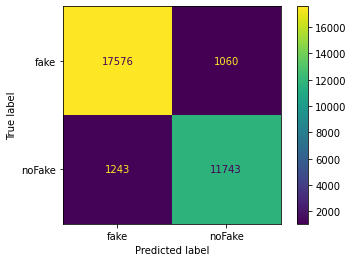

In [5]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y1predict = {}
with torch.no_grad():
  y1_test = np.concatenate((y1_testp1, y1_testp2,y1_testp3), axis=0)
  X1_test = torch.cat((X1_testp1.cpu(),X1_testp2.cpu(),X1_testp3.cpu()),0)
  y1_predictions = m3.predict(np.asarray(X1_test),verbose=2).round()
  print(len(y1_predictions))
  confusion = multilabel_confusion_matrix(y1_test,y1_predictions)
  print(f"acc: {accuracy_score(y1_test,y1_predictions)}")
  print(f"precision: {precision_score(y1_test,y1_predictions,average='macro')}")
  print(f"recall: {recall_score(y1_test,y1_predictions,average='macro')}")
  print(f"f1: {f1_score(y1_test,y1_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')

989/989 - 8s - 8s/epoch - 9ms/step
31622
acc: 0.9267598507368288
precision: 0.9251185940576738
recall: 0.9233173807432489
f1: 0.9267598507368289


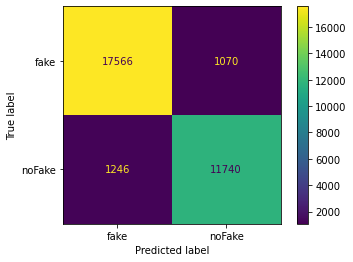

In [5]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y2predict = {}
with torch.no_grad():
  y2_test = np.concatenate((y2_testp1, y2_testp2,y2_testp3), axis=0)
  X2_test = torch.cat((X2_testp1.cpu(),X2_testp2.cpu(),X2_testp3.cpu()),0)
  y2_predictions = m3.predict(np.asarray(X2_test),verbose=2).round()
  print(len(y2_predictions))
  confusion = multilabel_confusion_matrix(y2_test,y2_predictions)
  print(f"acc: {accuracy_score(y2_test,y2_predictions)}")
  print(f"precision: {precision_score(y2_test,y2_predictions,average='macro')}")
  print(f"recall: {recall_score(y2_test,y2_predictions,average='macro')}")
  print(f"f1: {f1_score(y2_test,y2_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')

### Model Training

### Performance Metrics And Accuracy

Modelos con dropout

In [ ]:
%time X1_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_train/X1_train_tensorp0.pt')
%time X1_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_train/X1_train_tensorp1.pt')
%time X1_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_train/X1_train_tensorp2.pt')
%time y1_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_train/y1_train_tensorp0.pt')
%time y1_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_train/y1_train_tensorp1.pt')
%time y1_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_train/y1_train_tensorp2.pt')

CPU times: user 2.8 s, sys: 3.14 s, total: 5.94 s
Wall time: 14.9 s
CPU times: user 393 ms, sys: 1.33 s, total: 1.72 s
Wall time: 19.1 s
CPU times: user 409 ms, sys: 1.27 s, total: 1.67 s
Wall time: 25.1 s
CPU times: user 2.1 ms, sys: 1.06 ms, total: 3.16 ms
Wall time: 536 ms
CPU times: user 2.65 ms, sys: 0 ns, total: 2.65 ms
Wall time: 498 ms
CPU times: user 2.55 ms, sys: 0 ns, total: 2.55 ms
Wall time: 452 ms


In [ ]:
%time X1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_test/X1_test_tensorp0.pt')
%time X1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_test/X1_test_tensorp1.pt')
%time X1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_test/X1_test_tensorp2.pt')
%time y1_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_test/y1_test_tensorp0.pt')
%time y1_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_test/y1_test_tensorp1.pt')
%time y1_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_test/y1_test_tensorp2.pt')
%time X1_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_val/X1_val_tensorp0.pt',map_location=torch.device('cpu'))
%time X1_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_val/X1_val_tensorp1.pt',map_location=torch.device('cpu'))
%time X1_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/X1_val/X1_val_tensorp2.pt',map_location=torch.device('cpu'))
%time y1_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_val/y1_val_tensorp0.pt',map_location=torch.device('cpu'))
%time y1_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_val/y1_val_tensorp1.pt',map_location=torch.device('cpu'))
%time y1_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/Emociones/Muestras/Tensores80/y1_val/y1_val_tensorp2.pt',map_location=torch.device('cpu'))

CPU times: user 171 ms, sys: 556 ms, total: 726 ms
Wall time: 8.61 s
CPU times: user 163 ms, sys: 554 ms, total: 717 ms
Wall time: 10.6 s
CPU times: user 192 ms, sys: 609 ms, total: 801 ms
Wall time: 10.7 s
CPU times: user 1.67 ms, sys: 1.73 ms, total: 3.4 ms
Wall time: 1.62 s
CPU times: user 2.06 ms, sys: 1.1 ms, total: 3.15 ms
Wall time: 459 ms
CPU times: user 2.02 ms, sys: 941 µs, total: 2.96 ms
Wall time: 516 ms
CPU times: user 27.7 ms, sys: 1.07 s, total: 1.1 s
Wall time: 13.4 s
CPU times: user 43.9 ms, sys: 1.12 s, total: 1.17 s
Wall time: 14.1 s
CPU times: user 33.4 ms, sys: 1.13 s, total: 1.16 s
Wall time: 15.9 s
CPU times: user 2.6 ms, sys: 677 µs, total: 3.27 ms
Wall time: 2.86 s
CPU times: user 3.15 ms, sys: 0 ns, total: 3.15 ms
Wall time: 969 ms
CPU times: user 2.87 ms, sys: 59 µs, total: 2.93 ms
Wall time: 423 ms


Ajuste tamaño tensores

In [ ]:
X1_trainp1 =  torch.reshape(X1_trainp1, (X1_trainp1.shape[0], 1,X1_trainp1.shape[1]))
X1_trainp2 =  torch.reshape(X1_trainp2, (X1_trainp2.shape[0], 1,X1_trainp2.shape[1]))
X1_trainp3 =  torch.reshape(X1_trainp3, (X1_trainp3.shape[0], 1,X1_trainp3.shape[1]))

In [ ]:
from keras.utils import to_categorical

y1_trainp1 = to_categorical(y1_trainp1.cpu(), num_classes=2)
y1_trainp2 = to_categorical(y1_trainp2.cpu(), num_classes=2)
y1_trainp3 = to_categorical(y1_trainp3.cpu(), num_classes=2)


Creación de modelos

In [ ]:
m1 = crearModeloDropout()

In [ ]:
history1 = m1.fit(np.asarray(X1_trainp1.cpu()), np.asarray(y1_trainp1)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
782/782 [==============================] - 9s 5ms/step - loss: 0.5269 - categorical_accuracy: 0.7185
Epoch 2/20
782/782 [==============================] - 4s 5ms/step - loss: 0.1681 - categorical_accuracy: 0.9404
Epoch 3/20
782/782 [==============================] - 4s 5ms/step - loss: 0.1055 - categorical_accuracy: 0.9635
Epoch 4/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0777 - categorical_accuracy: 0.9745
Epoch 5/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0524 - categorical_accuracy: 0.9827
Epoch 6/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0374 - categorical_accuracy: 0.9883
Epoch 7/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0276 - categorical_accuracy: 0.9922
Epoch 8/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0232 - categorical_accuracy: 0.9936
Epoch 9/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0177 - categorical_accuracy:

In [ ]:
history1 = m1.fit(np.asarray(X1_trainp2.cpu()), np.asarray(y1_trainp2)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
782/782 [==============================] - 4s 5ms/step - loss: 0.4761 - categorical_accuracy: 0.8971
Epoch 2/20
782/782 [==============================] - 4s 5ms/step - loss: 0.1560 - categorical_accuracy: 0.9448
Epoch 3/20
782/782 [==============================] - 4s 5ms/step - loss: 0.1184 - categorical_accuracy: 0.9576
Epoch 4/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0939 - categorical_accuracy: 0.9679
Epoch 5/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0743 - categorical_accuracy: 0.9751
Epoch 6/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0578 - categorical_accuracy: 0.9813
Epoch 7/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0455 - categorical_accuracy: 0.9861
Epoch 8/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0342 - categorical_accuracy: 0.9894
Epoch 9/20
782/782 [==============================] - 4s 5ms/step - loss: 0.0254 - categorical_accuracy:

In [ ]:
history1 = m1.fit(np.asarray(X1_trainp3.cpu()), np.asarray(y1_trainp3)
          ,epochs=20
          ,use_multiprocessing=True)

Epoch 1/20
744/744 [==============================] - 3s 5ms/step - loss: 0.4104 - categorical_accuracy: 0.9105
Epoch 2/20
744/744 [==============================] - 3s 5ms/step - loss: 0.1515 - categorical_accuracy: 0.9474
Epoch 3/20
744/744 [==============================] - 3s 5ms/step - loss: 0.1131 - categorical_accuracy: 0.9593
Epoch 4/20
744/744 [==============================] - 3s 5ms/step - loss: 0.0891 - categorical_accuracy: 0.9679
Epoch 5/20
744/744 [==============================] - 3s 5ms/step - loss: 0.0700 - categorical_accuracy: 0.9758
Epoch 6/20
744/744 [==============================] - 3s 5ms/step - loss: 0.0529 - categorical_accuracy: 0.9831
Epoch 7/20
744/744 [==============================] - 3s 5ms/step - loss: 0.0392 - categorical_accuracy: 0.9878
Epoch 8/20
744/744 [==============================] - 3s 5ms/step - loss: 0.0273 - categorical_accuracy: 0.9927
Epoch 9/20
744/744 [==============================] - 3s 5ms/step - loss: 0.0196 - categorical_accuracy:

In [ ]:
m1.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modelo1LSTMDropoutTrain.h5')

In [ ]:
from keras.models import load_model
m1 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modelo1LSTMDropoutTrain.h5')

In [ ]:
X1_valp1 =  torch.reshape(X1_valp1, (X1_valp1.shape[0], 1,X1_valp1.shape[1]))
X1_valp2 =  torch.reshape(X1_valp2, (X1_valp2.shape[0], 1,X1_valp2.shape[1]))
X1_valp3 =  torch.reshape(X1_valp3, (X1_valp3.shape[0], 1,X1_valp3.shape[1]))
X1_testp1 =  torch.reshape(X1_testp1, (X1_testp1.shape[0], 1,X1_testp1.shape[1]))
X1_testp2 =  torch.reshape(X1_testp2, (X1_testp2.shape[0], 1,X1_testp2.shape[1]))
X1_testp3 =  torch.reshape(X1_testp3, (X1_testp3.shape[0], 1,X1_testp3.shape[1]))

In [ ]:
from keras.utils import to_categorical
y1_valp1 = to_categorical(y1_valp1.cpu(), num_classes=2)
y1_valp2 = to_categorical(y1_valp2.cpu(), num_classes=2)
y1_valp3 = to_categorical(y1_valp3.cpu(), num_classes=2)

y1_testp1 = to_categorical(y1_testp1.cpu(), num_classes=2)
y1_testp2 = to_categorical(y1_testp2.cpu(), num_classes=2)
y1_testp3 = to_categorical(y1_testp3.cpu(), num_classes=2)

In [ ]:
modelo1

In [ ]:
#validacion
m1.evaluate(np.asarray(X1_valp1.cpu()), np.asarray(y1_valp1),verbose=2)
m1.evaluate(np.asarray(X1_valp2.cpu()), np.asarray(y1_valp2),verbose=2)
m1.evaluate(np.asarray(X1_valp3.cpu()), np.asarray(y1_valp3),verbose=2)

469/469 - 2s - loss: 0.6326 - categorical_accuracy: 0.9163
469/469 - 1s - loss: 0.6612 - categorical_accuracy: 0.9174
475/475 - 1s - loss: 0.6352 - categorical_accuracy: 0.9155


[0.6351933479309082, 0.9155133962631226]

989/989 - 2s
31622
acc: 0.9166086901524255
precision: 0.9138778823126839
recall: 0.9138295267176794
f1: 0.9166086901524255


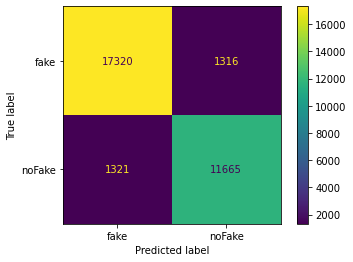

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
y1predict = {}
with torch.no_grad():
  y1_test = np.concatenate((y1_testp1, y1_testp2,y1_testp3), axis=0)
  X1_test = torch.cat((X1_testp1.cpu(),X1_testp2.cpu(),X1_testp3.cpu()),0)
  y1_predictions = m1.predict(np.asarray(X1_test),verbose=2).round()
  print(len(y1_predictions))
  confusion = multilabel_confusion_matrix(y1_test,y1_predictions)
  print(f"acc: {accuracy_score(y1_test,y1_predictions)}")
  print(f"precision: {precision_score(y1_test,y1_predictions,average='macro')}")
  print(f"recall: {recall_score(y1_test,y1_predictions,average='macro')}")
  print(f"f1: {f1_score(y1_test,y1_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')


In [ ]:
%time X2_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_train/X2_train_tensorp0.pt')
%time X2_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_train/X2_train_tensorp1.pt')
%time X2_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_train/X2_train_tensorp2.pt')
%time y2_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_train/y2_train_tensorp0.pt')
%time y2_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_train/y2_train_tensorp1.pt')
%time y2_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_train/y2_train_tensorp2.pt')

Ajuste tamaño tensores

In [ ]:
X2_trainp1 =  torch.reshape(X2_trainp1, (X2_trainp1.shape[0], 1,X2_trainp1.shape[1]))
X2_trainp2 =  torch.reshape(X2_trainp2, (X2_trainp2.shape[0], 1,X2_trainp2.shape[1]))
X2_trainp3 =  torch.reshape(X2_trainp3, (X2_trainp3.shape[0], 1,X2_trainp3.shape[1]))

In [ ]:
from keras.utils import to_categorical

y2_trainp1 = to_categorical(y2_trainp1.cpu(), num_classes=2)
y2_trainp2 = to_categorical(y2_trainp2.cpu(), num_classes=2)
y2_trainp3 = to_categorical(y2_trainp3.cpu(), num_classes=2)


Creación de modelos

In [ ]:
m2 = crearModeloDropout()

In [ ]:
history1 = m2.fit(np.asarray(X2_trainp1.cpu()), np.asarray(y2_trainp1)
          ,epochs=20
          ,use_multiprocessing=True)

In [ ]:
history1 = m2.fit(np.asarray(X2_trainp2.cpu()), np.asarray(y2_trainp2)
          ,epochs=20
          ,use_multiprocessing=True)

In [ ]:
history1 = m2.fit(np.asarray(X2_trainp3.cpu()), np.asarray(y2_trainp3)
          ,epochs=20
          ,use_multiprocessing=True)

In [ ]:
m2.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modelo2LSTMDropoutTrain.h5')

In [ ]:
from keras.models import load_model
m2 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modelo3LSTMDropoutTrain.h5')

In [ ]:
%time X2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_test/X2_test_tensorp0.pt')
%time X2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_test/X2_test_tensorp1.pt')
%time X2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_test/X2_test_tensorp2.pt')
%time y2_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_test/y2_test_tensorp0.pt')
%time y2_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_test/y2_test_tensorp1.pt')
%time y2_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_test/y2_test_tensorp2.pt')
%time X2_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_val/X2_val_tensorp0.pt',map_location=torch.device('cpu'))
%time X2_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_val/X2_val_tensorp1.pt',map_location=torch.device('cpu'))
%time X2_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X2_val/X2_val_tensorp2.pt',map_location=torch.device('cpu'))
%time y2_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_val/y2_val_tensorp0.pt',map_location=torch.device('cpu'))
%time y2_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_val/y2_val_tensorp1.pt',map_location=torch.device('cpu'))
%time y2_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y2_val/y2_val_tensorp2.pt',map_location=torch.device('cpu'))

In [ ]:
X2_valp1 =  torch.reshape(X2_valp1, (X2_valp1.shape[0], 1,X2_valp1.shape[1]))
X2_valp2 =  torch.reshape(X2_valp2, (X2_valp2.shape[0], 1,X2_valp2.shape[1]))
X2_valp3 =  torch.reshape(X2_valp3, (X2_valp3.shape[0], 1,X2_valp3.shape[1]))
X2_testp1 =  torch.reshape(X2_testp1, (X2_testp1.shape[0], 1,X2_testp1.shape[1]))
X2_testp2 =  torch.reshape(X2_testp2, (X2_testp2.shape[0], 1,X2_testp2.shape[1]))
X2_testp3 =  torch.reshape(X2_testp3, (X2_testp3.shape[0], 1,X2_testp3.shape[1]))

In [ ]:
from keras.utils import to_categorical
y2_valp1 = to_categorical(y2_valp1.cpu(), num_classes=2)
y2_valp2 = to_categorical(y2_valp2.cpu(), num_classes=2)
y2_valp3 = to_categorical(y2_valp3.cpu(), num_classes=2)

y2_testp1 = to_categorical(y2_testp1.cpu(), num_classes=2)
y2_testp2 = to_categorical(y2_testp2.cpu(), num_classes=2)
y2_testp3 = to_categorical(y2_testp3.cpu(), num_classes=2)

In [ ]:
#validacion
m2.evaluate(np.asarray(X2_valp1.cpu()), np.asarray(y2_valp1),verbose=2)
m2.evaluate(np.asarray(X2_valp2.cpu()), np.asarray(y2_valp2),verbose=2)
m2.evaluate(np.asarray(X2_valp3.cpu()), np.asarray(y2_valp3),verbose=2)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix

with torch.no_grad():
  y2_test = np.concatenate((y2_testp1, y2_testp2,y2_testp3), axis=0)
  X2_test = torch.cat((X2_testp1.cpu(),X2_testp2.cpu(),X2_testp3.cpu()),0)
  y2_predictions = m2.predict(np.asarray(X2_test),verbose=2).round()
  print(len(y2_predictions))
  confusion = multilabel_confusion_matrix(y2_test,y2_predictions)
  print(f"acc: {accuracy_score(y2_test,y2_predictions)}")
  print(f"precision: {precision_score(y2_test,y2_predictions,average='macro')}")
  print(f"recall: {recall_score(y2_test,y2_predictions,average='macro')}")
  print(f"f1: {f1_score(y2_test,y2_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')


Modelo 3

In [ ]:
%time X3_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_train/X3_train_tensorp0.pt')
%time X3_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_train/X3_train_tensorp1.pt')
%time X3_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_train/X3_train_tensorp2.pt')
%time y3_trainp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_train/y3_train_tensorp0.pt')
%time y3_trainp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_train/y3_train_tensorp1.pt')
%time y3_trainp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_train/y3_train_tensorp2.pt')

Ajuste tamaño tensores

In [ ]:
X3_trainp1 =  torch.reshape(X3_trainp1, (X3_trainp1.shape[0], 1,X3_trainp1.shape[1]))
X3_trainp2 =  torch.reshape(X3_trainp2, (X3_trainp2.shape[0], 1,X3_trainp2.shape[1]))
X3_trainp3 =  torch.reshape(X3_trainp3, (X3_trainp3.shape[0], 1,X3_trainp3.shape[1]))

In [ ]:
from keras.utils import to_categorical

y3_trainp1 = to_categorical(y3_trainp1.cpu(), num_classes=2)
y3_trainp2 = to_categorical(y3_trainp2.cpu(), num_classes=2)
y3_trainp3 = to_categorical(y3_trainp3.cpu(), num_classes=2)


Creación de modelos

In [ ]:
m3 = crearModeloDropout()

In [ ]:
history1 = m3.fit(np.asarray(X3_trainp1.cpu()), np.asarray(y3_trainp1)
          ,epochs=20
          ,use_multiprocessing=True)

In [ ]:
history1 = m3.fit(np.asarray(X3_trainp2.cpu()), np.asarray(y3_trainp2)
          ,epochs=20
          ,use_multiprocessing=True)

In [ ]:
history1 = m3.fit(np.asarray(X3_trainp3.cpu()), np.asarray(y3_trainp3)
          ,epochs=20
          ,use_multiprocessing=True)

In [ ]:
m3.save('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modelo3LSTMDropoutTrain.h5')

In [ ]:
from keras.models import load_model
m3 = load_model('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/modelos/modelo3LSTMDropoutTrain.h5')

In [ ]:
%time X3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_test/X3_test_tensorp0.pt')
%time X3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_test/X3_test_tensorp1.pt')
%time X3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_test/X3_test_tensorp2.pt')
%time y3_testp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_test/y3_test_tensorp0.pt')
%time y3_testp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_test/y3_test_tensorp1.pt')
%time y3_testp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_test/y3_test_tensorp2.pt')
%time X3_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_val/X3_val_tensorp0.pt',map_location=torch.device('cpu'))
%time X3_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_val/X3_val_tensorp1.pt',map_location=torch.device('cpu'))
%time X3_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/X3_val/X3_val_tensorp2.pt',map_location=torch.device('cpu'))
%time y3_valp1 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_val/y3_val_tensorp0.pt',map_location=torch.device('cpu'))
%time y3_valp2 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_val/y3_val_tensorp1.pt',map_location=torch.device('cpu'))
%time y3_valp3 = torch.load('/gdrive/My Drive/Colab Notebooks/dataset/tesis/fakeNewsNet/muestras/tensores/y3_val/y3_val_tensorp2.pt',map_location=torch.device('cpu'))

In [ ]:
X3_valp1 =  torch.reshape(X3_valp1, (X3_valp1.shape[0], 1,X3_valp1.shape[1]))
X3_valp2 =  torch.reshape(X3_valp2, (X3_valp2.shape[0], 1,X3_valp2.shape[1]))
X3_valp3 =  torch.reshape(X3_valp3, (X3_valp3.shape[0], 1,X3_valp3.shape[1]))
X3_testp1 =  torch.reshape(X3_testp1, (X3_testp1.shape[0], 1,X3_testp1.shape[1]))
X3_testp2 =  torch.reshape(X3_testp2, (X3_testp2.shape[0], 1,X3_testp2.shape[1]))
X3_testp3 =  torch.reshape(X3_testp3, (X3_testp3.shape[0], 1,X3_testp3.shape[1]))

In [ ]:
from keras.utils import to_categorical
y3_valp1 = to_categorical(y3_valp1.cpu(), num_classes=2)
y3_valp2 = to_categorical(y3_valp2.cpu(), num_classes=2)
y3_valp3 = to_categorical(y3_valp3.cpu(), num_classes=2)

y3_testp1 = to_categorical(y3_testp1.cpu(), num_classes=2)
y3_testp2 = to_categorical(y3_testp2.cpu(), num_classes=2)
y3_testp3 = to_categorical(y3_testp3.cpu(), num_classes=2)

In [ ]:
#validacion
m3.evaluate(np.asarray(X3_valp1.cpu()), np.asarray(y3_valp1),verbose=2)
m3.evaluate(np.asarray(X3_valp2.cpu()), np.asarray(y3_valp2),verbose=2)
m3.evaluate(np.asarray(X3_valp3.cpu()), np.asarray(y3_valp3),verbose=2)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score, precision_score, multilabel_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix

with torch.no_grad():
  y3_test = np.concatenate((y3_testp1, y3_testp2,y3_testp3), axis=0)
  X3_test = torch.cat((X3_testp1.cpu(),X3_testp2.cpu(),X3_testp3.cpu()),0)
  y3_predictions = m3.predict(np.asarray(X3_test),verbose=2).round()
  print(len(y3_predictions))
  confusion = multilabel_confusion_matrix(y3_test,y3_predictions)
  print(f"acc: {accuracy_score(y3_test,y3_predictions)}")
  print(f"precision: {precision_score(y3_test,y3_predictions,average='macro')}")
  print(f"recall: {recall_score(y3_test,y3_predictions,average='macro')}")
  print(f"f1: {f1_score(y3_test,y3_predictions,average='micro')}")
  confusion_display = ConfusionMatrixDisplay(confusion[0],display_labels=['fake','noFake']).plot(values_format='d')

